# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the first few rows of the combined DataFrame for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [147]:
# Show the number of mice from the merged DataFrame
num_mice_merged = combined_data['Mouse ID'].nunique()
print(f"Number of mice from the merged DataFrame: {num_mice_merged}")

Number of mice from the merged DataFrame: 249


In [148]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [146]:
# Create a clean DataFrame by dropping duplicate mice
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [150]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of mice from the clean DataFrame: {num_mice_cleaned}")

Number of mice from the clean DataFrame: 249


## Summary Statistics

In [152]:
# Group by Drug Regimen and calculate summary statistics
regimen_group = cleaned_data.groupby('Drug Regimen')
summary_statistics = regimen_group['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM='sem'
)

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(summary_statistics)

# Display the summary DataFrame
summary_df

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

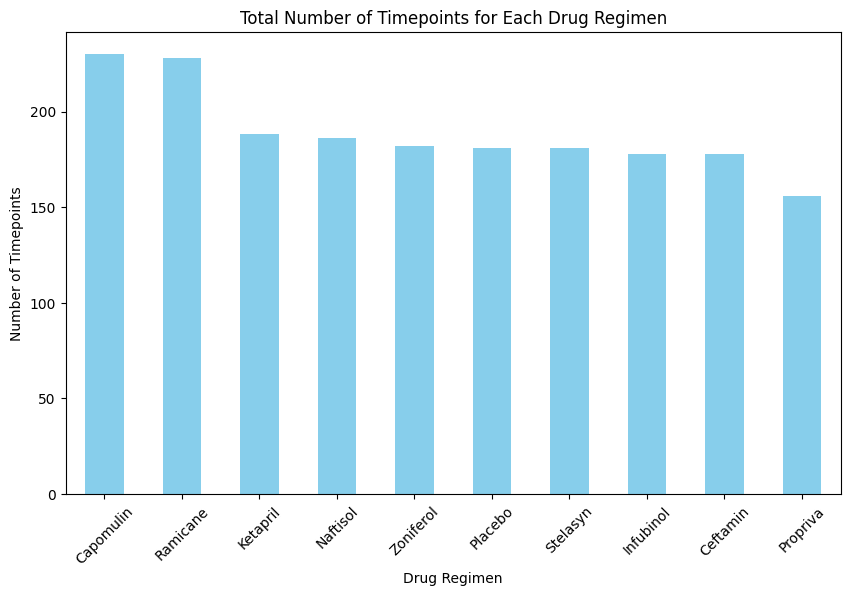

In [156]:

# Generate a bar plot showing the total number of timepoints for each drug regimen using Pandas
timepoints_per_regimen = cleaned_data['Drug Regimen'].value_counts()
timepoints_per_regimen.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()


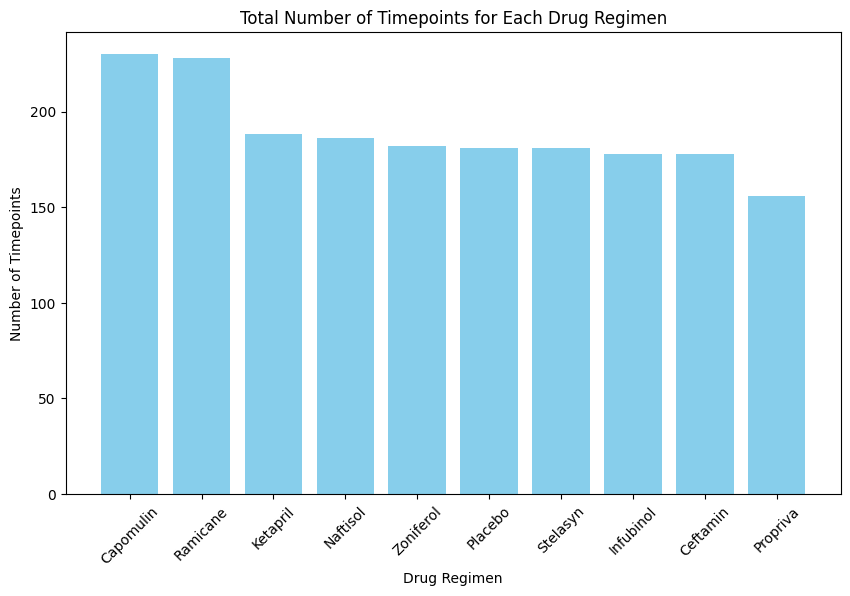

In [157]:
# Grouping the data by "Drug Regimen" and counting the number of timepoints in each group
timepoints_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Extracting drug regimens and corresponding timepoint counts
regimens = timepoints_per_regimen.index
timepoints = timepoints_per_regimen.values

# Creating the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimens, timepoints, color='skyblue')

# Adding title and labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.show()


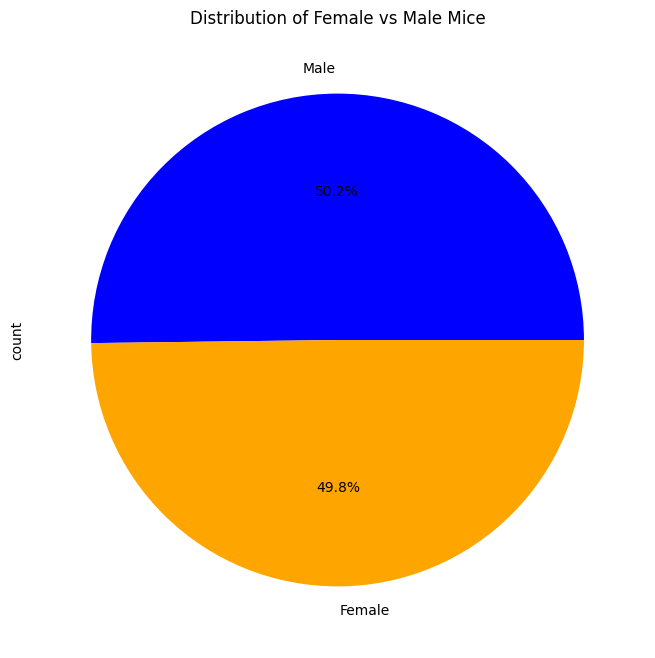

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Grouping the data by "Sex" and counting the number of mice in each group
sex_distribution = cleaned_data['Sex'].value_counts()

# Plotting the pie plot
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], figsize=(8, 8))

# Adding title
plt.title('Distribution of Female vs Male Mice')

# Displaying the plot
plt.show()


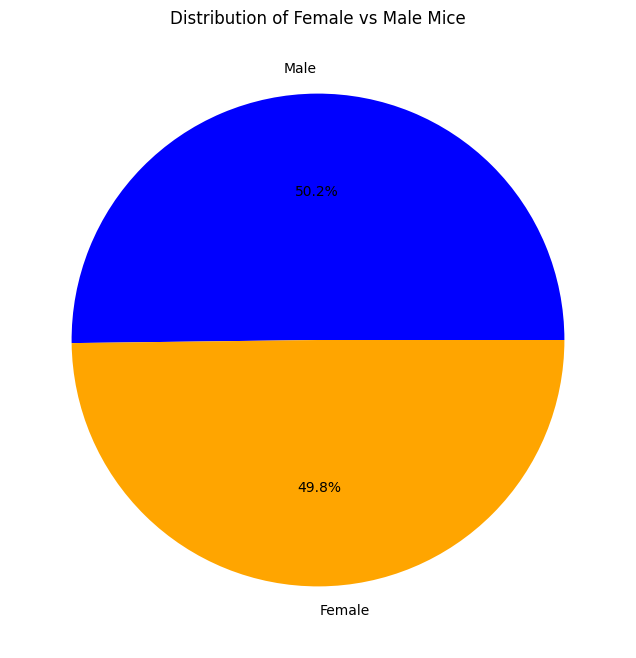

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Grouping the data by "Sex" and counting the number of mice in each group
sex_distribution = cleaned_data['Sex'].value_counts()

# Plotting the pie plot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])

# Adding title
plt.title('Distribution of Female vs Male Mice')

# Displaying the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = cleaned_data.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
greatest_tp

Drug Regimen  Mouse ID
Capomulin     b128        0
              b742        0
              f966        0
              g288        0
              g316        0
                         ..
Zoniferol     q633        0
              s337        0
              w140        0
              w575        0
              x613        0
Name: Timepoint, Length: 249, dtype: int64

In [129]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df = pd.merge(greatest_tp_df, cleaned_data, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
#greatest_tp_df.info()
greatest_tp_df

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,0,Female,9,22,45.0,0
1,Capomulin,b742,0,Male,7,21,45.0,0
2,Capomulin,f966,0,Male,16,17,45.0,0
3,Capomulin,g288,0,Male,3,19,45.0,0
4,Capomulin,g316,0,Female,22,22,45.0,0
...,...,...,...,...,...,...,...,...
244,Zoniferol,q633,0,Male,12,25,45.0,0
245,Zoniferol,s337,0,Male,14,27,45.0,0
246,Zoniferol,w140,0,Female,19,30,45.0,0
247,Zoniferol,w575,0,Female,16,28,45.0,0


In [130]:
# Put treatments into a list for for loop (and later for plot labels)
treatment= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    volume_df = combined_data.loc[combined_data["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    
# Determine Quartiles, IQR, Lower Bound, Upper Bound    
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

# Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
   # print(f"{(outliers)}")
    print(f"Outlier: {(outliers)}")

Outlier: 1391    25.472143
1392    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outlier: 809    22.050126
Name: Tumor Volume (mm3), dtype: float64
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


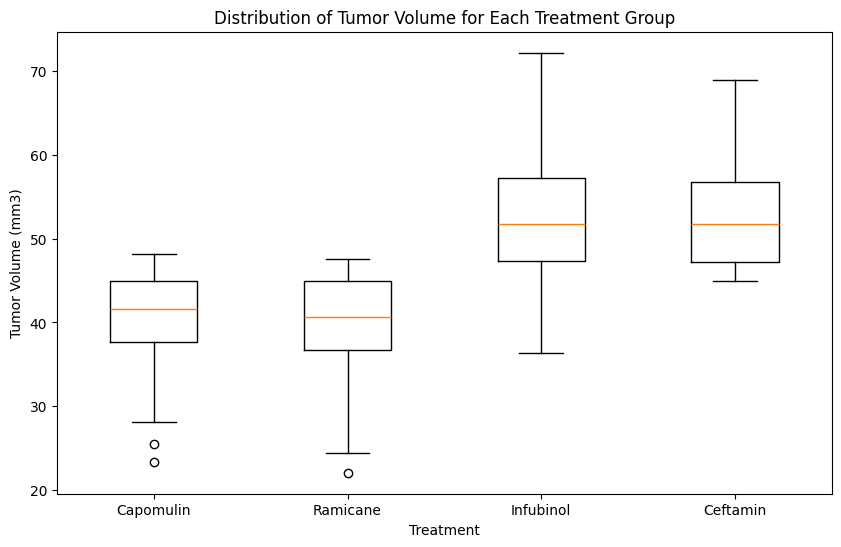

In [131]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol, labels=treatment)

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

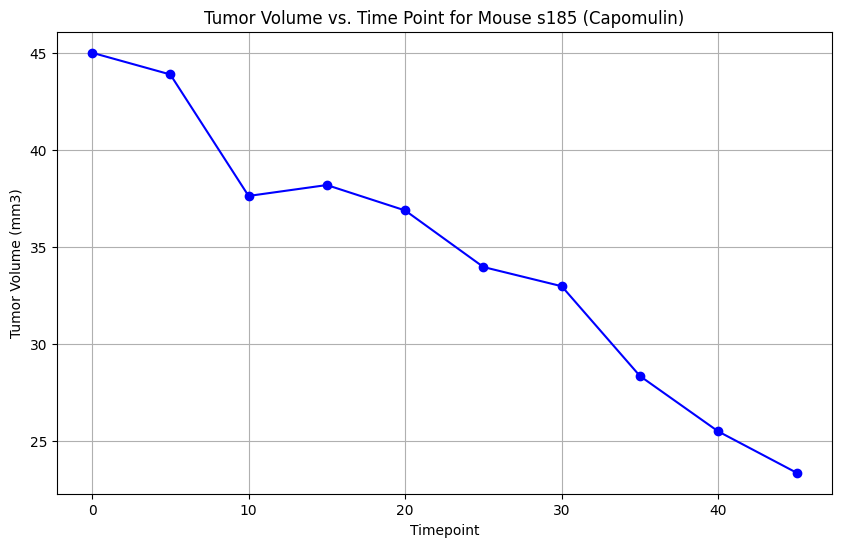

In [158]:
# Filter data for one mouse treated with Capomulin
mouse_id = 's185'  # Example mouse ID
mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id)]

# Plot tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.grid(True)
plt.show()


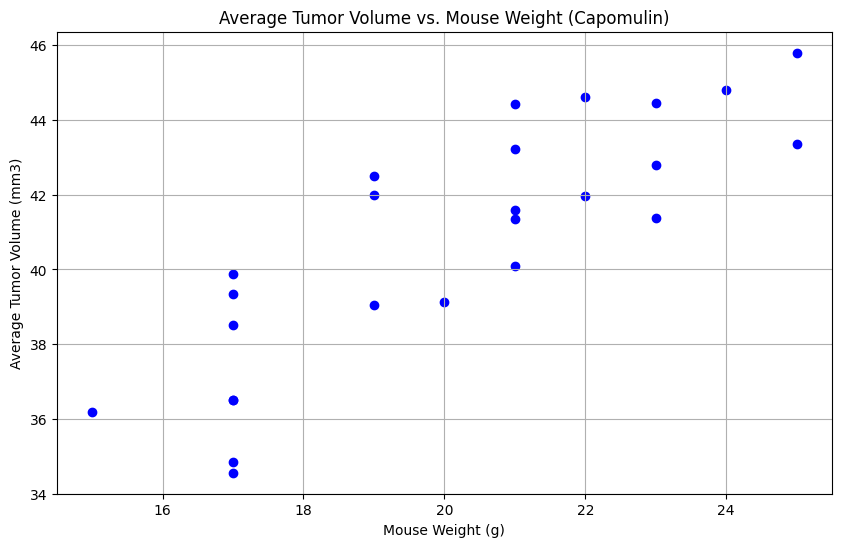

In [159]:
# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and weight for each mouse
average_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
average_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_weight, average_volume, color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


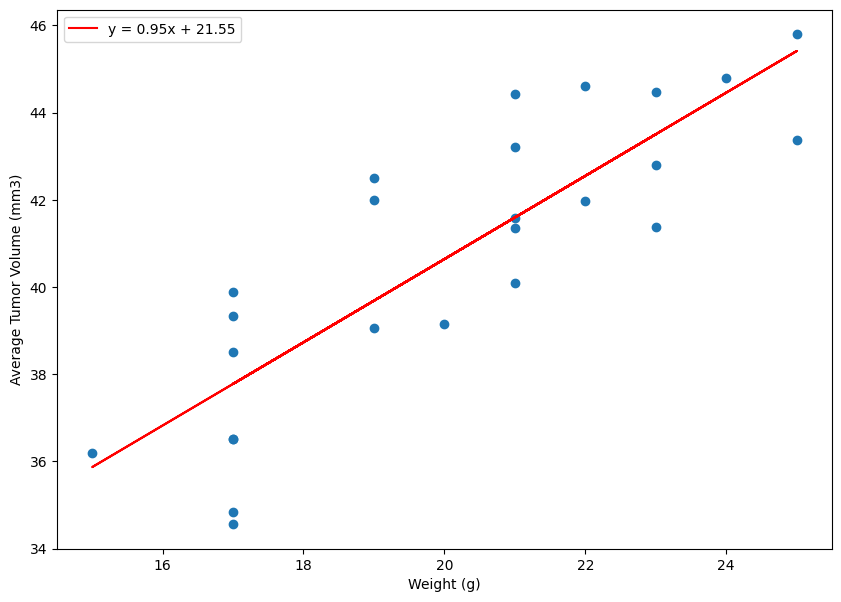

In [160]:
import scipy.stats as st
import matplotlib.pyplot as plt

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group the filtered data by Mouse ID and calculate the average tumor volume and weight
vol_avg = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Calculate the correlation coefficient
correlation = round(st.pearsonr(vol_avg['Weight (g)'], vol_avg['Tumor Volume (mm3)'])[0], 2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

# Calculate linear regression values using st.linregress() function
lin_reg = st.linregress(vol_avg['Weight (g)'], vol_avg['Tumor Volume (mm3)'])
slope = lin_reg.slope
intercept = lin_reg.intercept

# Plot the regression line
line = slope * vol_avg['Weight (g)'] + intercept

# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(vol_avg['Weight (g)'], vol_avg['Tumor Volume (mm3)'])

# Plot the linear regression line
plt.plot(vol_avg['Weight (g)'], line, 'r', label=f'y = {slope:.2f}x + {intercept:.2f}')

# Add labels and legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend(loc='best')

# Show the plot
plt.show()
